In [1]:
import cv2
import os
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 18s 2us/step


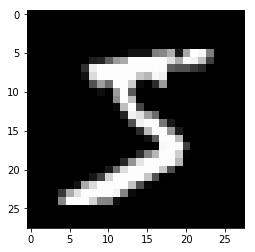

5


In [4]:
plt.imshow(X_train[0], cmap="gray")
plt.show()
print (y_train[0])

In [5]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [6]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [8]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000,)


In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:

model = Sequential()

## Declare the layers
layer_1 = Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1))
layer_2 = Conv2D(64, kernel_size=3, activation='relu')
layer_3 = Flatten()
layer_4 = Dense(10, activation='softmax')


model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 100s 53ms/step - loss: 0.3181 - accuracy: 0.9557 - val_loss: 0.0969 - val_accuracy: 0.9699
Epoch 2/3
1875/1875 [==============================] - 100s 53ms/step - loss: 0.0601 - accuracy: 0.9817 - val_loss: 0.0726 - val_accuracy: 0.9772
Epoch 3/3
1875/1875 [==============================] - 93s 49ms/step - loss: 0.0397 - accuracy: 0.9879 - val_loss: 0.0935 - val_accuracy: 0.9758


Prediction (Softmax) from the neural network:

 [[1.0000000e+00 3.6302704e-14 1.0943390e-08 1.9654501e-13 1.2107117e-14
  2.9644145e-11 2.5031426e-08 4.4328334e-14 8.9734464e-10 3.2867511e-11]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


--------- Prediction --------- 




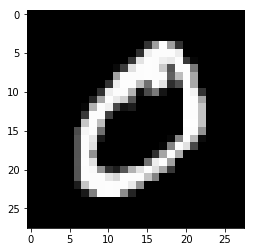



Final Output: 0


In [17]:
example = X_train[1]
prediction = model.predict(example.reshape(1, 28, 28, 1))
## First output
print ("Prediction (Softmax) from the neural network:\n\n {}".format(prediction))
## Second output
hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
## Third output
print ("\n\n--------- Prediction --------- \n\n")
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()
print("\n\nFinal Output: {}".format(np.argmax(prediction)))




----------------Contoured Image--------------------


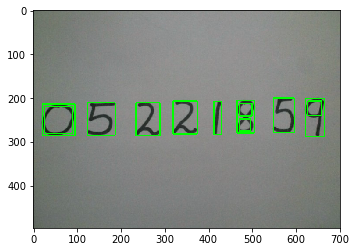

In [19]:
image = cv2.imread('image.jpg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)



---------------------------------------


=========PREDICTION============ 




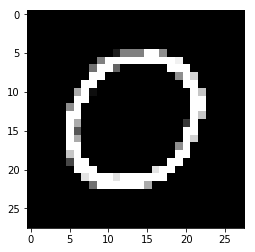



Final Output: 0

Prediction (Softmax) from the neural network:

 [[9.9355799e-01 9.7019484e-15 1.0358382e-11 9.9930253e-10 3.1844860e-21
  1.4461030e-16 1.8315672e-12 5.5509151e-13 3.1645828e-10 6.4420230e-03]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




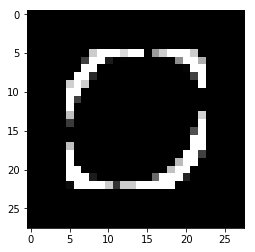



Final Output: 8

Prediction (Softmax) from the neural network:

 [[2.00542398e-02 1.43049956e-11 1.85276993e-04 1.61064439e-03
  7.67599803e-11 1.84442254e-03 1.80324825e-10 7.34250508e-11
  9.58430111e-01 1.78752653e-02]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




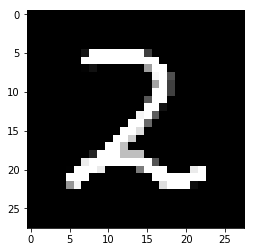



Final Output: 2

Prediction (Softmax) from the neural network:

 [[4.5435056e-22 1.3452056e-15 1.0000000e+00 3.1924132e-13 5.4140126e-17
  3.5768618e-24 1.2477748e-25 2.1626726e-12 1.3126662e-15 2.8324952e-20]]


Hard-maxed form of the prediction: 

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




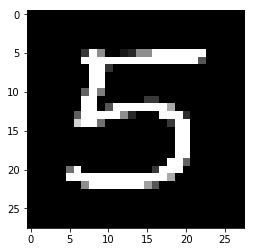



Final Output: 5

Prediction (Softmax) from the neural network:

 [[6.89191843e-26 1.80728989e-28 7.33446334e-30 1.05319886e-19
  6.03198665e-24 1.00000000e+00 1.61971376e-24 4.16584473e-28
  5.40412087e-20 1.41701088e-21]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




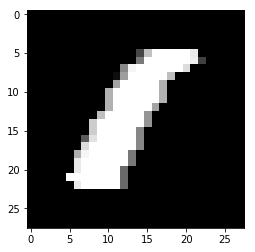



Final Output: 8

Prediction (Softmax) from the neural network:

 [[9.8079450e-02 3.9407448e-03 5.3544361e-05 9.6560946e-08 6.7564233e-06
  6.3521289e-03 1.2033249e-05 5.1251497e-10 8.9134252e-01 2.1272361e-04]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




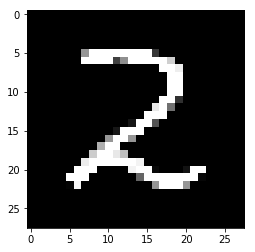



Final Output: 2

Prediction (Softmax) from the neural network:

 [[5.3768254e-23 9.0473773e-18 1.0000000e+00 1.1288299e-11 2.1201729e-18
  1.1803430e-24 3.5657059e-23 9.1747443e-13 1.6998413e-11 3.5019558e-17]]


Hard-maxed form of the prediction: 

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




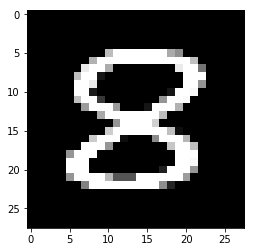



Final Output: 8

Prediction (Softmax) from the neural network:

 [[1.38546536e-19 2.46327687e-23 1.34258585e-11 1.98428168e-07
  6.42807292e-24 8.69013412e-13 4.23322312e-20 1.21451282e-23
  9.99999762e-01 2.13176091e-11]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




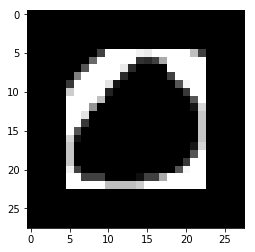



Final Output: 0

Prediction (Softmax) from the neural network:

 [[9.9756706e-01 4.2147225e-10 3.3581273e-06 2.5336425e-07 1.1727961e-12
  1.7573164e-10 8.2925289e-10 3.1063605e-14 2.3750218e-03 5.4309650e-05]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




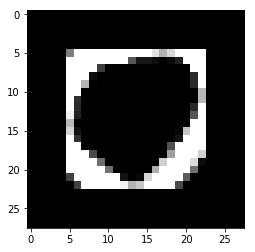



Final Output: 0

Prediction (Softmax) from the neural network:

 [[9.9999905e-01 2.2464505e-16 8.4336655e-08 1.1150204e-07 1.6943032e-20
  9.5377739e-10 4.7251411e-15 6.3332373e-10 7.3503074e-08 5.5934436e-07]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




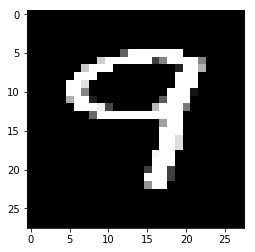



Final Output: 9

Prediction (Softmax) from the neural network:

 [[2.4354959e-08 1.2177810e-10 1.0822127e-03 7.9272846e-05 5.4051156e-08
  3.8325016e-08 3.8400155e-12 5.1797673e-05 2.2037600e-03 9.9658281e-01]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




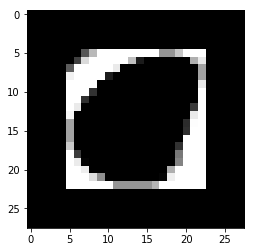



Final Output: 9

Prediction (Softmax) from the neural network:

 [[2.3583765e-01 1.1953322e-11 6.2848740e-05 2.5771062e-05 9.0687999e-13
  1.5514380e-06 6.2524552e-12 8.3368340e-10 6.5490576e-03 7.5752312e-01]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




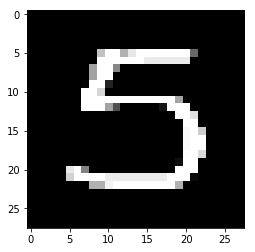



Final Output: 5

Prediction (Softmax) from the neural network:

 [[3.9592762e-21 1.6239865e-27 1.6475138e-23 8.9775275e-16 1.0212069e-29
  1.0000000e+00 8.0151920e-19 6.1464863e-21 9.2685937e-14 1.6299039e-16]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


---------------------------------------




In [20]:
for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))  
    
    print ("\n\n---------------------------------------\n\n")
    print ("=========PREDICTION============ \n\n")
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("\n\nFinal Output: {}".format(np.argmax(prediction)))
    
    print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))
    
    hard_maxed_prediction = np.zeros(prediction.shape)
    hard_maxed_prediction[0][np.argmax(prediction)] = 1
    print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
    print ("\n\n---------------------------------------\n\n")